# 母集団と標本

# R演習

## 平均・分散・標準偏差

### 利用するデータ1

引き続き`palmerpenguins`のデータを利用する

In [ ]:
library(pacman)
p_load(palmerpenguins)
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...

### 算術平均

算術平均を算出する関数として`mean()`関数がある.
`penguins`のデータには欠測値があるので, `na.rm = TRUE`を引数に追加する.

データフレームを直接引数として取ることはできない.
小数点以下の値を丸めるには`round()`関数を利用する.
第2引数で小数点以下何桁表示するかを与える.

In [ ]:
mean(penguins$bill_length_mm, na.rm = TRUE)

[1] 43.92193

[1] 43.92

### `summary()`関数を用いて平均を求める

`summary()`関数でも算術平均を知ることができる.
`summary()`関数はベクトルでもデータフレームでも良い.

In [ ]:
summary(penguins$bill_length_mm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  32.10   39.23   44.45   43.92   48.50   59.60       2 

      species          island    bill_length_mm  bill_depth_mm  
 Adelie   :152   Biscoe   :168   Min.   :32.10   Min.   :13.10  
 Chinstrap: 68   Dream    :124   1st Qu.:39.23   1st Qu.:15.60  
 Gentoo   :124   Torgersen: 52   Median :44.45   Median :17.30  
                                 Mean   :43.92   Mean   :17.15  
                                 3rd Qu.:48.50   3rd Qu.:18.70  
                                 Max.   :59.60   Max.   :21.50  
                                 NA's   :2       NA's   :2      
 flipper_length_mm  body_mass_g       sex           year     
 Min.   :172.0     Min.   :2700   female:165   Min.   :2007  
 1st Qu.:190.0     1st Qu.:3550   male  :168   1st Qu.:2007  
 Median :197.0     Median :4050   NA's  : 11   Median :2008  
 Mean   :200.9     Mean   :4202                Mean   :2008  
 3rd Qu.:213.0     3rd Qu.:4750                3rd Qu.:2009  
 Max.   :231.0     Max.   :6300                Max.   :2009  
 NA's   :2         NA's   :2                  

### ヒストグラムに算術平均を加える

`ggplot2`で縦線を加えるにはグラフに`geom_vline()`を追加する.
`xintercept`でx軸のどこに線を引くのかを与える. ここでは,
算術平均を計算し, 与えている.
線は`linetype`で指定できるため点線を指定し,
`colour`で線の色を赤に指定した.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

(`stat_bin()`).

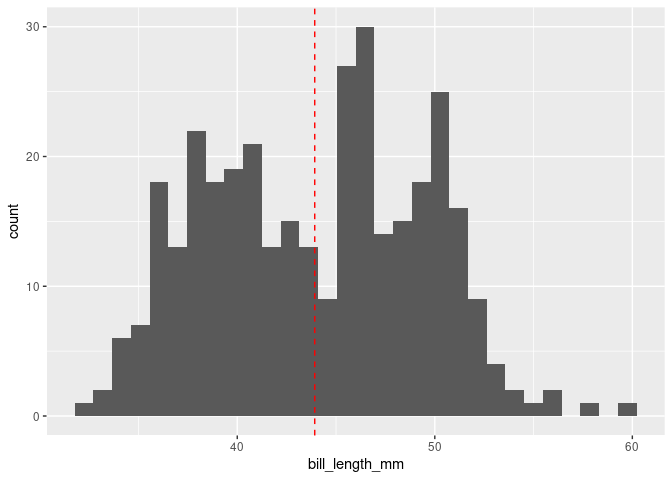

In [ ]:
p_load(ggplot2)
ggplot(penguins) +
  aes(x = bill_length_mm) +
  geom_histogram() +
  geom_vline(
    xintercept = 
      mean(penguins$bill_length_mm,
           na.rm = TRUE
      ),
    linetype = "dashed",
    colour   = "red"
  )

### 算術平均からの偏差の和

算術平均からの偏差の和が0になることを検証する. 数値計算上,
割り切れない場合はごく小さい値が算出されることもあることに注意.

In [ ]:
sum(
  penguins$bill_length_mm -
    mean(penguins$bill_length_mm,
         na.rm = TRUE
    ),
  na.rm = TRUE
)

[1] 3.481659e-13

### 標本分散

標本分散を求めるために各データから平均を引いて2乗し, その平均を取る.
Rにデフォルトで搭載されている`var()`関数は標本分散ではない(以降扱う不偏分散($n$ではなく,
$n-1$で除す)).

In [ ]:
mean(
  (penguins$bill_length_mm -
    mean(penguins$bill_length_mm,
      na.rm = TRUE
    )
  )^2,
  na.rm = TRUE
)

[1] 29.7199

### 不偏分散

不偏分散を求めるには`var()`関数を用いる.

In [ ]:
var(penguins$bill_length_mm,
    na.rm = TRUE)

[1] 29.80705

### 標本分散を見やすくコーディングする(応用)

パイプ演算子を利用するとコードが読みやすくなる.

In [ ]:
p_load(magrittr)
penguins %$%
  subtract(
    bill_length_mm,
    bill_length_mm |>
      mean(na.rm = TRUE)
  ) |>
  raise_to_power(2) |>
  mean(na.rm = TRUE)

[1] 29.7199

### 標本分散の関数化

以降利用しやすいように標本分散を関数にする.

In [ ]:
sample_var <- function(x) {
  subtract(
    x,
    x |>
      mean(na.rm = TRUE)
  ) |>
    raise_to_power(2) |>
    mean(na.rm = TRUE)
}
sample_var(penguins$bill_length_mm)

[1] 29.7199

### 標本標準偏差

標本標準偏差を求めるために各データから平均を引いた値の平方平均(標本分散)の平方根を求める.
Rにデフォルトで搭載されている`sd()`関数は標本標準偏差ではない(以降扱う不偏分散の平方根).

In [ ]:
sqrt(
  mean(
    (penguins$bill_length_mm - 
      mean(penguins$bill_length_mm,
           na.rm = TRUE
           )
      )^2,
      na.rm = TRUE
  )
)

[1] 5.451596

### 不偏分散の平方根

不偏分散の平方根を求めるには`sd()`関数を利用する.
不偏分散の平方根は不偏性を持っていないことに注意.

In [ ]:
sd(penguins$bill_length_mm,
   na.rm = TRUE)

[1] 5.459584

### 標本標準偏差を見やすくコーディングする(応用)

パイプ演算子を利用するとコードが読みやすくなる.

In [ ]:
penguins %$% 
  subtract(bill_length_mm,
           bill_length_mm |> 
             mean(na.rm = TRUE)) |> 
  raise_to_power(2) |> 
  mean(na.rm = TRUE) |> 
  sqrt()

[1] 5.451596

### 標本標準偏差の関数化

以降利用しやすいように標本標準偏差を関数にする.

In [ ]:
sample_sd <- function(x){
  subtract(x,
           x |> 
             mean(na.rm = TRUE)) |> 
    raise_to_power(2) |>  
    mean(na.rm = TRUE) |> 
    sqrt()
}
sample_sd(penguins$bill_length_mm)

[1] 5.451596

### データの標準化

データを標準化するには`scale()`関数を利用する. 出力結果は少し厄介.

In [ ]:
head(scale(penguins$bill_length_mm))

           [,1]
[1,] -0.8832047
[2,] -0.8099390
[3,] -0.6634077
[4,]         NA
[5,] -1.3227986
[6,] -0.8465718

## 大数の弱法則と中心極限定理

### 利用するデータ2

今回はggplot2パッケージに含まれる`diamonds`というデータセットを利用する.
約54,000行10列からなるデータであり, ダイヤモンドの価格(\$)やカラット,
カットのクオリティなどの属性値が含まれる.

このデータを母集団に見立てて, サンプリングの学習を行う.
母集団がやや小さいことやサンプルサイズや標本数は計算の都合上やや小さいことに注意.
まずは`diamonds`データの列名を`names()`関数を利用して確認する.

In [ ]:
names(diamonds)

 [1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"      

### データの先頭6行確認する

`head()`関数を利用して`diamonds`データの先頭6行を確認する.

In [ ]:
head(diamonds)

# A tibble: 6 × 10
  carat cut       color clarity depth table price     x     y     z
  <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48

### データ構造を確認する

`dplyr`パッケージの`glimpse()`関数を利用して`diamonds`データのデータ構造を確認する.
行数や列数, 各列のデータ型などを把握する.

In [ ]:
p_load(dplyr)
dplyr::glimpse(diamonds)

Rows: 53,940
Columns: 10
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.22, 0.23, 0.…
$ cut     <ord> Ideal, Premium, Good, Premium, Good, Very Good, Very Good, Ver…
$ color   <ord> E, E, E, I, J, J, I, H, E, H, J, J, F, J, E, E, I, J, J, J, I,…
$ clarity <ord> SI2, SI1, VS1, VS2, SI2, VVS2, VVS1, SI1, VS2, VS1, SI1, VS1, …
$ depth   <dbl> 61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64…
$ table   <dbl> 55, 61, 65, 58, 58, 57, 57, 55, 61, 61, 55, 56, 61, 54, 62, 58…
$ price   <int> 326, 326, 327, 334, 335, 336, 336, 337, 337, 338, 339, 340, 34…
$ x       <dbl> 3.95, 3.89, 4.05, 4.20, 4.34, 3.94, 3.95, 4.07, 3.87, 4.00, 4.…
$ y       <dbl> 3.98, 3.84, 4.07, 4.23, 4.35, 3.96, 3.98, 4.11, 3.78, 4.05, 4.…
$ z       <dbl> 2.43, 2.31, 2.31, 2.63, 2.75, 2.48, 2.47, 2.53, 2.49, 2.39, 2.…

### データの概要を把握する

`summary()`関数を利用してデータの概要を把握する.

In [ ]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

### データ内の分散・標準偏差を求める

今回は`diamonds`データを母集団とみなすので, データの標本分散を求め,
母分散とみなす. 列は`price`を利用する.
後で利用するために母平均もオブジェクトに格納する.

In [ ]:
var_pop  <- sample_var(diamonds$price)
var_pop

[1] 15915334

[1] 3989.403

[1] 3932.8

### データのヒストグラムを描画する

`diamonds`データの`price`の列のヒストグラムを描画する.
価格や年収のデータに多い右に裾の長いデータになっている.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

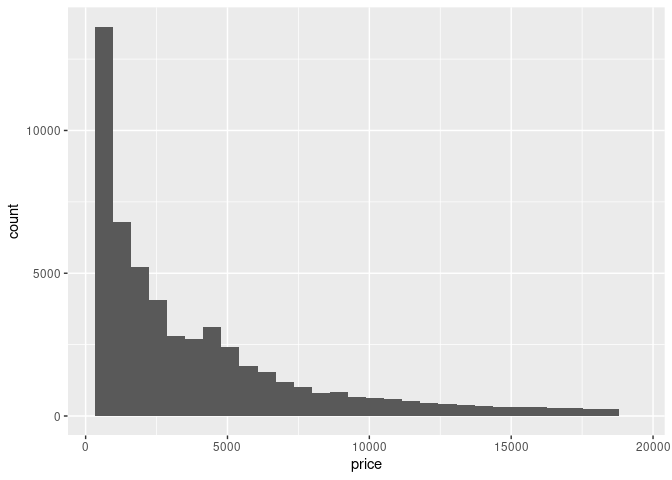

In [ ]:
ggplot(data = diamonds) +
  aes(x = price) +
  geom_histogram()

### データの無作為抽出

`dplyr::slice_sample()`関数を利用してデータの無作為抽出を行う.
`diamonds`データからサイズ100のサンプルを非復元抽出(`replace = FALSE`)し,
`ss`というオブジェクトに格納する.

無作為抽出の際に疑似乱数を利用しているので,
乱数の種を指定して結果を再現できるようにする.
`withr`パッケージの`with_seed()`関数を利用する.
第1引数で任意の乱数の種を指定し, 第2引数に実行する関数.

In [ ]:
p_load(withr)
ss <- withr::with_seed(
  2718,
  dplyr::slice_sample(
    diamonds, 
    n       = 100, 
    replace = FALSE
    )
  )

### 標本の概要を確認

`summary()`関数を利用して標本の概要を把握する.

In [ ]:
summary(ss)

     carat               cut     color     clarity       depth      
 Min.   :0.2300   Fair     : 2   D:12   SI1    :23   Min.   :58.40  
 1st Qu.:0.4000   Good     :11   E:25   VS2    :23   1st Qu.:61.20  
 Median :0.5600   Very Good:26   F:10   VS1    :17   Median :61.80  
 Mean   :0.8051   Premium  :18   G:22   SI2    :13   Mean   :61.97  
 3rd Qu.:1.0200   Ideal    :43   H:15   VVS2   : 9   3rd Qu.:62.60  
 Max.   :2.2500                  I:10   VVS1   : 9   Max.   :69.80  
                                 J: 6   (Other): 6                  
     table           price             x               y        
 Min.   :53.00   Min.   :  394   Min.   :3.830   Min.   :3.850  
 1st Qu.:56.00   1st Qu.: 1023   1st Qu.:4.760   1st Qu.:4.760  
 Median :57.00   Median : 2026   Median :5.320   Median :5.330  
 Mean   :57.67   Mean   : 3943   Mean   :5.716   Mean   :5.725  
 3rd Qu.:59.00   3rd Qu.: 5284   3rd Qu.:6.475   3rd Qu.:6.445  
 Max.   :64.00   Max.   :17366   Max.   :8.600   Max.   :8

### 標本の平均, 分散を母集団のそれと比較する

標本平均, 標本分散をそれぞれ母平均, 母分散と比較する.

In [ ]:
mean(ss$price)

[1] 3942.71

[1] 3932.8

[1] 16182348

[1] 15915334

### 標本データのヒストグラム

標本データもヒストグラムを描画する. 形状は似ているが,
母集団を再現するには至らない.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

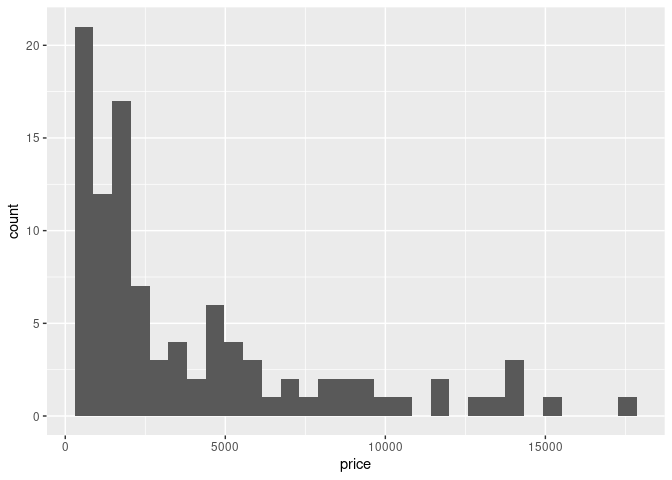

In [ ]:
ggplot(data = ss) +
  aes(x = price) +
  geom_histogram()

### 標本の数を増やす

サイズ500のサンプルを1000個(サンプル数1000)作成する.
繰り返し行う処理などは`tidyverse`パッケージに含まれている`purrr`パッケージを利用すると便利.
`purrr::map()`関数は, 第1引数で指定したリストに対して,
第2引数以降で書かれた関数を実行してくれる.
ここでは第2引数で`~`を使って無名関数を定義している. 結果は`List`形式.

In [ ]:
p_load(purrr)
ms <- with_seed(
  2718,
  purrr::map(
    1:1000,
    \(x) slice_sample(
      diamonds,
      n       = 500,
      replace = FALSE
      )
    )
  )

### 各標本の標本平均を求める

`dplyr::summarise()`関数はデータを要約する関数.
`sample_mean`という列名を作成し,
そこに`ms`オブジェクトの中の各`price`の値の平均を格納する.
最後に結果のリストを`list_rbind()`関数を利用して,
各標本の平均を1つのデータフレームに縦方向に整理する.

In [ ]:
ms_mean <- purrr::map(
  ms, 
  dplyr::summarise,
  sample_mean = mean(price)
  ) |> 
  list_rbind()

### 標本平均の平均を求める

標本平均の平均を求め, 母平均と比較する.
標本平均の標本平均値は母平均ととても近い値になる.
サンプルサイズをさらに増やすと標本平均は母平均と一致する.

In [ ]:
mean(ms_mean$sample_mean)

[1] 3937.012

[1] 3932.8

### 標本平均の分散

標本平均の分散は$\frac{\sigma^2}{n}$と近似する.

In [ ]:
sample_var(ms_mean$sample_mean)

[1] 31888.15

[1] 31830.67

### 標本平均のヒストグラム

標本平均の分布は平均$\mu$,
分散$\frac{\sigma^2}{n}$の正規分布で近似できる.
中心極限定理は元の分布を問わない.

ℹ Please use `linewidth` instead.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

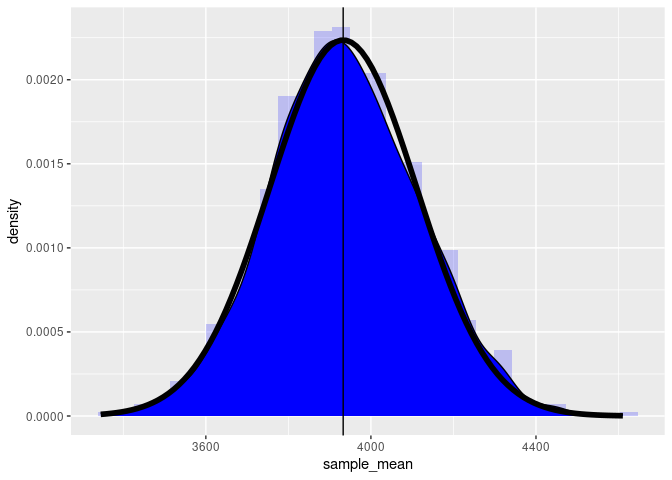

In [ ]:
ggplot(data = ms_mean) +
  aes(x = sample_mean) +
  geom_histogram(
    aes(y = after_stat(density)),
    fill  = "blue",
    alpha = 0.2
    ) +
  geom_density(fill  = "blue") +
  geom_vline(xintercept = mean_pop) +
  stat_function(
    fun  = dnorm,
    args = list(
      mean = mean_pop,
      sd   = sqrt(var_pop / 500)),
    size = 2
    )

## 信頼区間

### 各サンプルの平均と95%信頼区間を計算する

`map()`関数と`list_rbind()`関数を利用して,
各サンプルの平均と95%信頼区間を計算し, データフレームへ変換する.
`.id = **`を指定することで,
`rerun()`関数で作成したリストの各リストの名前を`**`という名前の列に追加する.
ここでは各リストに通し番号が振られているので,
通し番号を`number`という列に格納している.

In [ ]:
ms_ci <- map(
  ms,
  summarise,
  lowerCI = mean(price) + 
    qnorm(0.025) * sqrt(var_pop / length(price)),
  mean    = mean(price),
  upperCI = mean(price) + 
    qnorm(0.975) * sqrt(var_pop / length(price))) |> 
  list_rbind(names_to = "number")

### 信頼区間とパラメーター

信頼区間にパラメーターが含まれるかどうかを1か0かで判定する.
データフレームで列を操作する(新しい列を作る,
列の中身を変更するetc…)場合には,
`dplyr`パッケージの`mutate()`関数を利用する.
第1引数に利用するデータフレーム,
第2引数に`** =`の`**`で列の名前を指定し, `=`の後で操作方法を指定する.
ここでは, さらに`dplyr`パッケージの`if_else()`関数を利用して,
信頼区間の下限より大きく, 上限より小さい場合に1,
そうでない場合に0を格納するように指示している.

In [ ]:
ci_TF <- dplyr::mutate(
  ms_ci, 
  TF = lowerCI <= mean_pop & upperCI >= mean_pop
  )

### 信頼区間にパラメーターが含まれる割合

先程作成した, TFの平均を計算する.
この平均は信頼区間にパラメーターが含まれる割合である.
実際に95%に近い値が算出されている.

In [ ]:
summarise(ci_TF, mean(TF))

# A tibble: 1 × 1
  `mean(TF)`
       <dbl>
1      0.947

### 

標本をすべて表示するのは多すぎるので, 先頭の100標本だけ表示する.
`geom_errobar()`関数は信頼区間などを示す際に利用できる.
`aes()`内で下限を`ymin`で, 上限を`ymax`で与える.

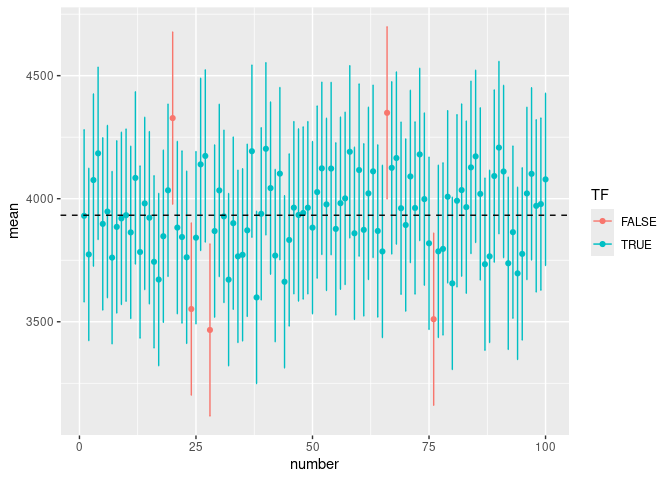

In [ ]:
ggplot(data = head(ci_TF, 100)) +
  aes(x      = number, 
      y      = mean,
      colour = TF) +
  geom_point() +
  geom_errorbar(
    aes(ymin = lowerCI,
        ymax = upperCI), 
    width = .2) +
  geom_hline(
    yintercept = mean_pop, 
    linetype   = "dashed", 
    colour     = "black")